In [1]:
''' import packages '''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

sns.set()

In [2]:
# load the data
HR = pd.read_csv('data/aug_train.csv')

In [3]:
# size of the data set
HR.shape

(19158, 14)

In [4]:
# have a first look at the data
HR.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


From the Kaggle website I got the following information about the features:

- enrollee_id : Unique ID for candidate

- city: City code

- city_ development _index : Developement index of the city (scaled)

- gender: Gender of candidate

- relevent_experience: Relevant experience of candidate

- enrolled_university: Type of University course enrolled if any

- education_level: Education level of candidate

- major_discipline :Education major discipline of candidate

- experience: Candidate total experience in years

- company_size: No of employees in current employer's company

- company_type : Type of current employer

- last_new_job: Difference in years between previous job and current job

- training_hours: training hours completed

- target: 0 – Not looking for job change, 1 – Looking for a job change

In [5]:
# find out how many values are missing (per column)
missing = pd.DataFrame(HR.isnull().sum(), columns=["Amount"])
missing['Percentage'] = round((missing['Amount']/HR.shape[0])*100, 2)
missing

,Amount,Percentage
enrollee_id,0,0.00
city,0,0.00
city_development_index,0,0.00
gender,4508,23.53
relevent_experience,0,0.00
enrolled_university,386,2.01
education_level,460,2.40
major_discipline,2813,14.68
experience,65,0.34
company_size,5938,30.99


We have quite a few missing values, especially in the categories company_type (32%), company_size (31%), gender (24%) and major_discipline (15%).

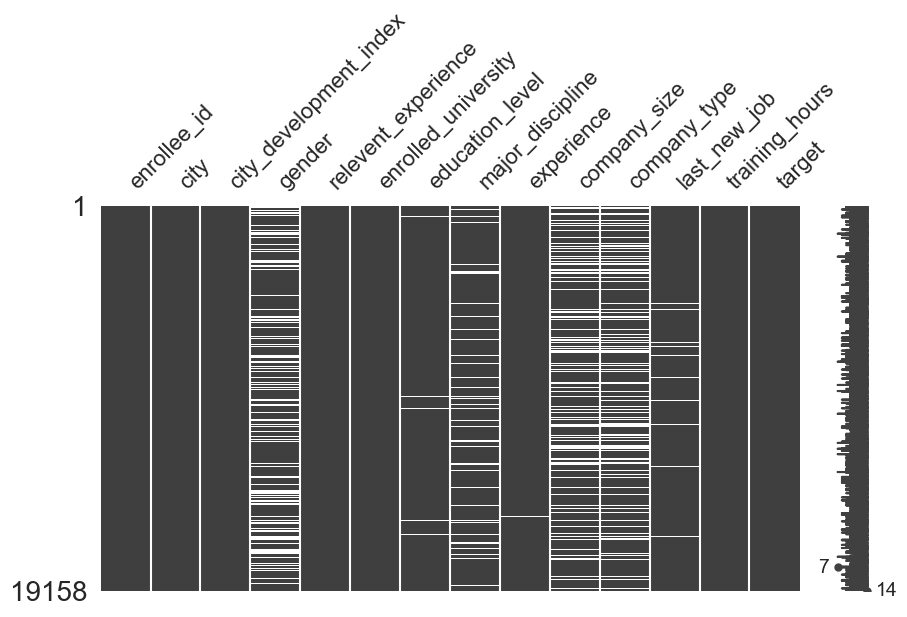

In [6]:
import missingno as msno
msno.matrix(HR, figsize=(10,5));

We can see a pattern here: The features company_size and company_type are often missing at the same time (but not always).

In [7]:
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [33]:
HR.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

There are no duplicates in the data set. I'll now plot the distribution of unique values for some of the columns. It will just give me some quick insights on:
- which values do we have?
- how are they distributed?

I only do this for categorical data that has no more than 10 unique values

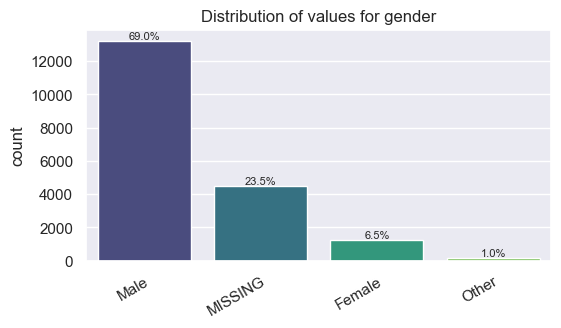

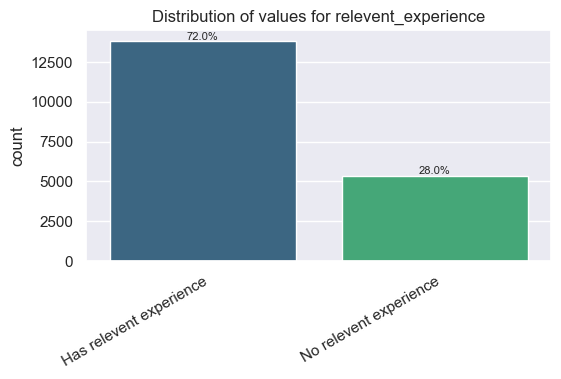

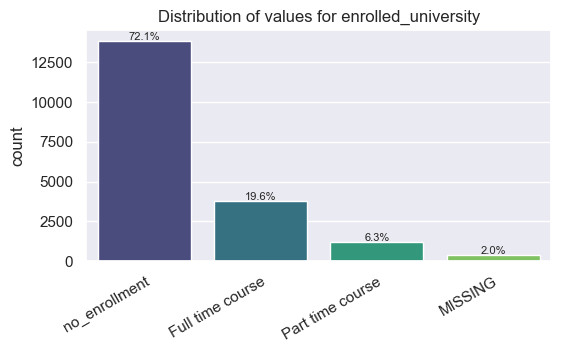

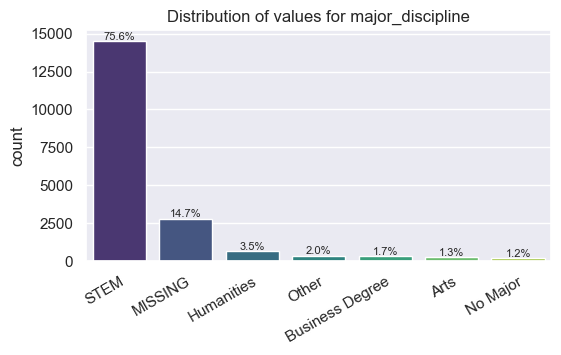

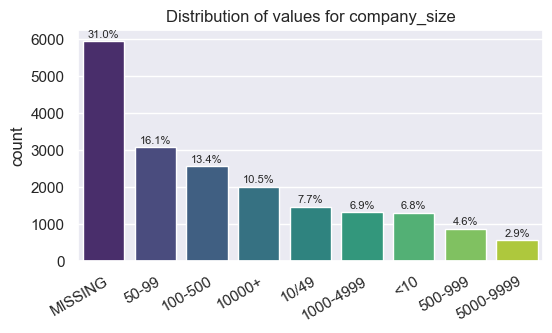

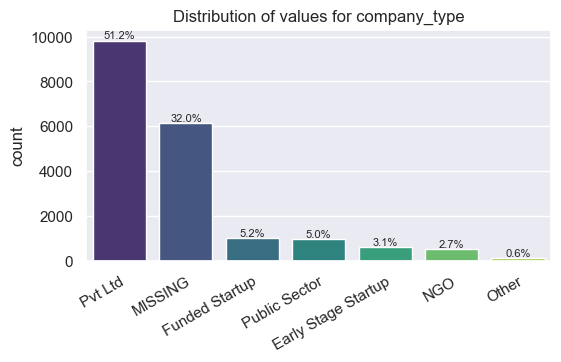

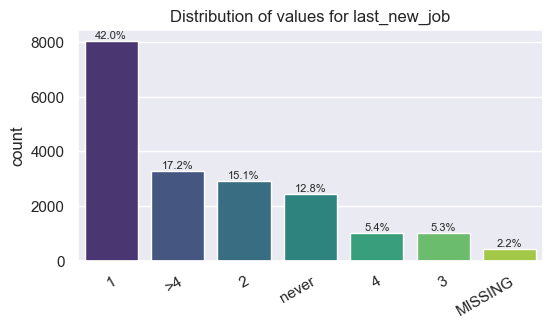

In [32]:
HR_filled = HR.fillna('MISSING')
features = ['gender','relevent_experience', 'enrolled_university','major_discipline', 'company_size', 'company_type', 'last_new_job']
for feature in features:
    plt.figure(figsize=(6, 3))
    ax = sns.countplot(x=feature, data=HR_filled, palette='viridis', order=HR_filled[feature].value_counts().index)
    plt.title(f'Distribution of values for {feature}')

    total = len(HR_filled[feature])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() + 0.005 * total  
        ax.text(x, y, percentage, ha='center', fontsize=8)  

    ax.set_xlabel('') 
    plt.xticks(rotation=30, rotation_mode='anchor', ha='right') 
    plt.show()

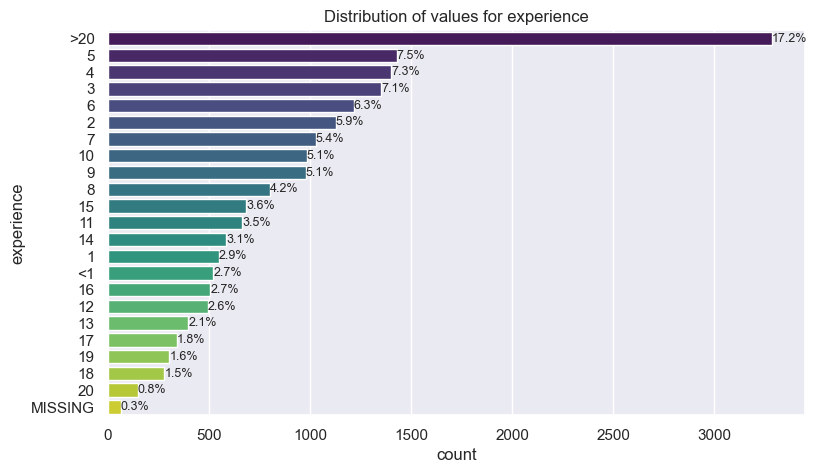

In [52]:
plt.figure(figsize=(9, 5))
ax = sns.countplot(data=HR_filled, y='experience', order=HR_filled['experience'].value_counts().head(HR_filled['experience'].nunique()).index, palette='viridis')

total = len(HR_filled.experience)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), fontsize=9, va='center')

plt.title('Distribution of values for experience')
plt.xlabel('count')
plt.ylabel('experience');

In [57]:
HR_filled['training_hours'].unique()

array([ 36,  47,  83,  52,   8,  24,  18,  46, 123,  32, 108,  23,  26,
       106,   7, 132,  68,  50,  48,  65,  13,  22, 148,  72,  40, 141,
        82, 145, 206, 152,  42,  14, 112,  87,  20,  21,  92, 102,  43,
        45,  19,  90,  25,  15,  98, 142,  28, 228,  29,  12,  17,  35,
         4, 136,  27,  74,  86,  75, 332, 140, 182, 172,  33,  34, 150,
       160,   3,   2, 210, 101,  59, 260, 131, 109,  70,  51,  60, 164,
       290, 133,  76, 156, 120, 100,  39,  55,  49,   6, 125, 326, 198,
        11,  41, 114, 246,  81,  31,  84, 105,  38, 178, 104, 202,  88,
       218,  62,  10,  80,  77,  37, 162, 190,  30,  16,   5,  54,  44,
       110, 262, 107, 134, 103,  96,  57, 240,  94, 113,  56,  64, 320,
         9, 129,  58, 126, 166,  95,  97, 204, 116, 161, 146, 302,  53,
       143, 124, 214, 288, 306, 322,  67,  61, 130, 220,  78, 314, 226,
       280,  91, 234, 163, 151,  85, 256, 168, 144,  66, 128,  73, 122,
       154,  63, 292, 188,  71, 135, 138, 184,  89, 157, 118, 11